In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv("drive/MyDrive/AIML/twitter-sentiment-analysis/Twitter_Data.csv")

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.isnull().sum()

,0
clean_text,4
category,7


In [5]:
null_values_df = df[df['clean_text'].isnull() | df['category'].isnull()]

print(null_values_df)


                                               clean_text  category
148                                                   NaN       0.0
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
158694                                                NaN      -1.0
159442               chidambaram gives praises modinomics       NaN
159443                                                NaN       0.0
160559  the reason why modi contested from seats 2014 ...       NaN
160560                                                NaN       1.0


In [6]:
df = df.dropna()

In [7]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
df.isnull().sum()

,0
clean_text,0
category,0


In [9]:
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [10]:
df.dtypes

,0
clean_text,object
category,float64


In [11]:
df.shape

(162969, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


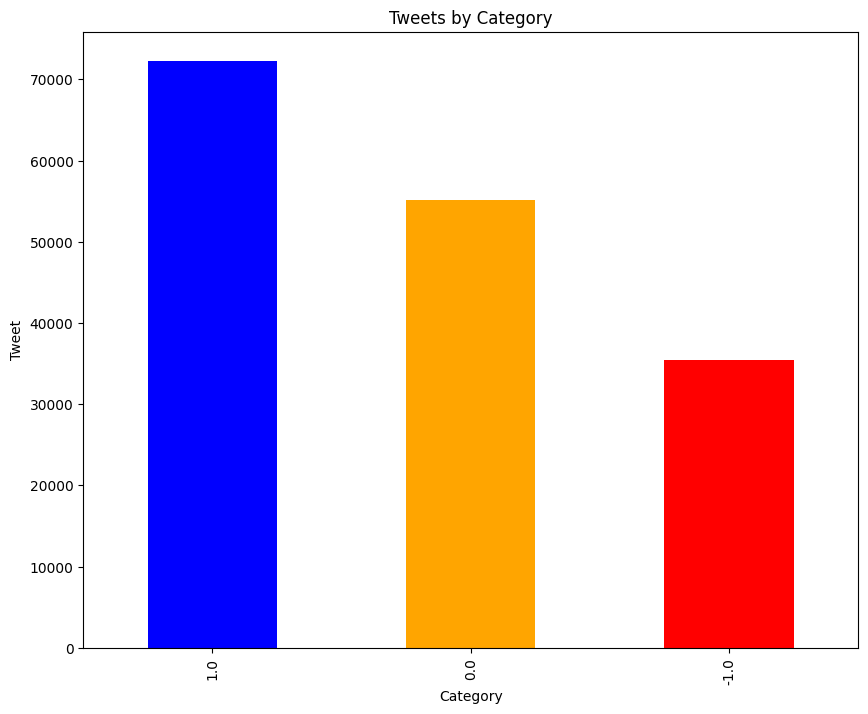

In [13]:
plt.figure(figsize=(10, 8))
df['category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title("Tweets by Category")
plt.xlabel("Category")
plt.ylabel("Tweet")
plt.show()

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
pattern =re.compile('[^a-zA-Z]')
english_stopwords = stopwords.words('english')
port_stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()

In [16]:
def preprocessed_text(text):

  stemmed_content = re.sub(pattern,' ',text)
  stemmed_content = stemmed_content.lower()

  stemmed_content = stemmed_content.split()

  # Apply lemmatization instead of stemming and remove stopwords
  stemmed_content = [lemmatizer.lemmatize(word) for word in stemmed_content if word not in english_stopwords]
  stemmed_content = ' '.join(stemmed_content)


  return stemmed_content

In [17]:
df['stemmed_content'] = df['clean_text'].apply(preprocessed_text)
df.head(20)

,clean_text,category,stemmed_content
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,0.0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,surat woman perform yagna seek divine grace na...
7,this comes from cabinet which has scholars lik...,0.0,come cabinet scholar like modi smriti hema tim...
8,with upcoming election india saga going import...,1.0,upcoming election india saga going important p...
9,gandhi was gay does modi,1.0,gandhi gay modi


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = df["stemmed_content"]
y = df["category"]
x_countvectorized = cv.fit_transform(x)

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [20]:
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

In [21]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [22]:
negative_text = " ".join(df_negative["stemmed_content"])

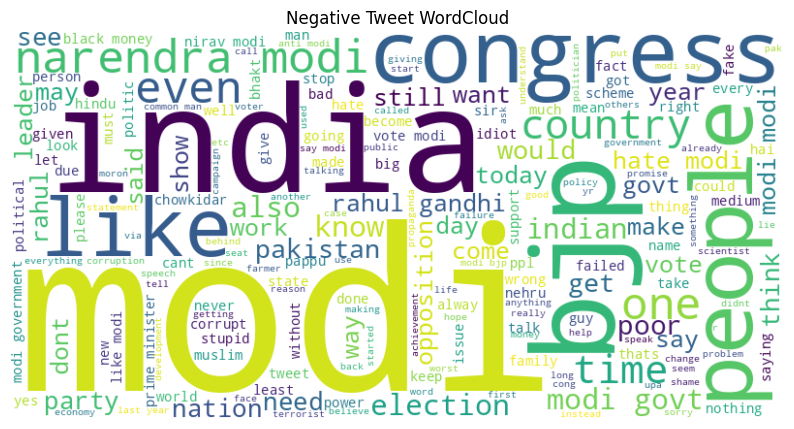

In [23]:
generate_wordcloud(negative_text, "Negative Tweet WordCloud")

In [24]:
positive_text = " ".join(df[df["category"] == 1]["stemmed_content"])

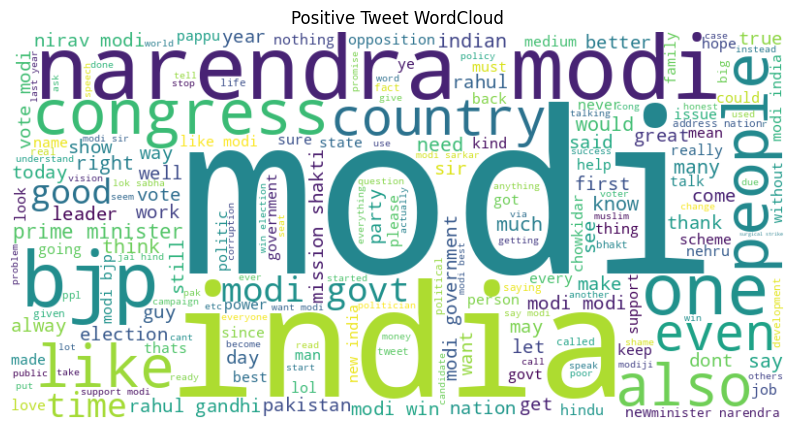

In [25]:
generate_wordcloud(positive_text, "Positive Tweet WordCloud")

In [26]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_countvectorized, y)

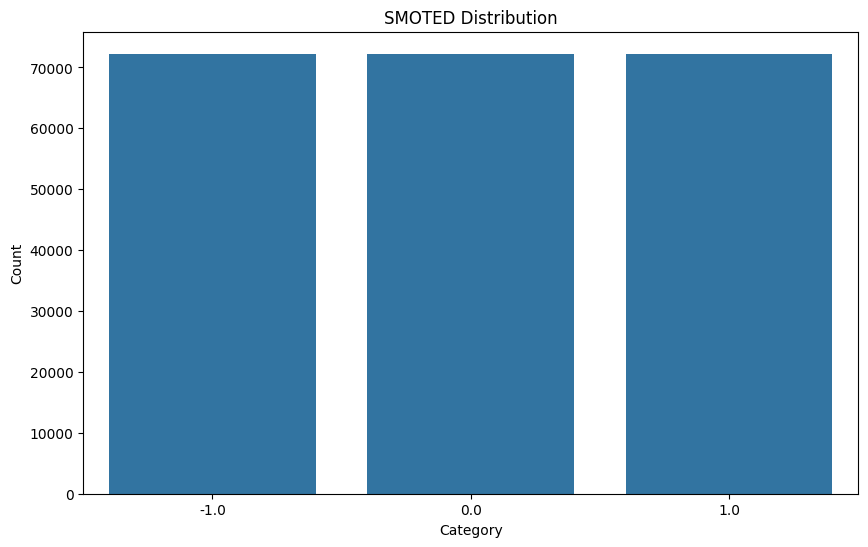

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x=y_smote)
plt.title("SMOTED Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [28]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_countvectorized, y, test_size=0.2, random_state=42)

In [30]:
#pip install catboost

In [31]:
#from catboost import CatBoostClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and catboost
#pipeline = Pipeline([
   # ('scaler', StandardScaler(with_mean=False)),
    #('logreg', CatBoostClassifier(random_state=42, iterations=500, learning_rate=0.1, depth=6, verbose=0))
#])

#pipeline.fit(X_train, Y_train)

# Predict on the test set
#Y_pred = pipeline.predict(X_test)

# Evaluate the model
#from sklearn.metrics import accuracy_score
#print(f'Accuracy: {accuracy_score(Y_test, Y_pred)*100:.2f}%')

In [32]:
# Predict on the training data
#Y_train_pred = pipeline.predict(X_train)

# Calculate training accuracy
#train_accuracy = accuracy_score(Y_train, Y_train_pred)

#print(f'Training Accuracy: {train_accuracy*100:.2f}%')

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

Training Accuracy : 0.9994477468839885
Validation Accuracy : 0.8427624716205436


In [37]:
pip freeze > requirements.txt